<a href="https://colab.research.google.com/github/mfavaits/YouTube-Series-on-Machine-Learning/blob/master/Covnets_Basics_with_Data_Augmentation_and_Dropout_100_Epochs_Dogs_vs_Cats_Small_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt

import os
import shutil

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


We will split cat and dog images and give them their own directories training_set_cats and training_set_dogs. We will do this by looping through the directory and look for files that start with dog. This process will take a few hours as we need to process 25000 files

Data augmentation is a way to generate more training examples via a few datatransformations so that algorithm does not see the same image twice. Universally used for computer vision 

In [6]:
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [0]:
train_datagen=ImageDataGenerator(rescale=1./255, rotation_range=40, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, zoom_range=0.2, horizontal_flip=True, fill_mode='nearest')
validation_datagen=ImageDataGenerator(rescale=1./255)

In [8]:
train_generator=train_datagen.flow_from_directory('/content/drive/My Drive/Colab Notebooks/training_2000', target_size=(150,150), batch_size=20, class_mode='binary')
validation_generator=validation_datagen.flow_from_directory('/content/drive/My Drive/Colab Notebooks/val_1000', target_size=(150,150), batch_size=20, class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [9]:
from keras import models
from keras import layers

model=models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [10]:
from keras import optimizers
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [11]:
history=model.fit_generator(train_generator, steps_per_epoch=100, epochs=100, validation_data=validation_generator, validation_steps=20)




Epoch 1/100





100/100 [==============================] - 462s 5s/step - loss: 0.6960 - acc: 0.4985 - val_loss: 0.6875 - val_acc: 0.5050
Epoch 2/100
100/100 [==============================] - 148s 1s/step - loss: 0.6885 - acc: 0.5390 - val_loss: 0.6765 - val_acc: 0.5750
Epoch 3/100
100/100 [==============================] - 124s 1s/step - loss: 0.6827 - acc: 0.5630 - val_loss: 0.6675 - val_acc: 0.6000
Epoch 4/100
100/100 [==============================] - 125s 1s/step - loss: 0.6693 - acc: 0.5895 - val_loss: 0.6616 - val_acc: 0.5875
Epoch 5/100
100/100 [==============================] - 119s 1s/step - loss: 0.6617 - acc: 0.6135 - val_loss: 0.6709 - val_acc: 0.6050
Epoch 6/100
100/100 [==============================] - 120s 1s/step - loss: 0.6609 - acc: 0.5900 - val_loss: 0.6166 - val_acc: 0.6375
Epoch 7/100
100/100 [==============================] - 117s 1s/step - loss: 0.6484 - acc: 0.6170 - val_loss: 0.6136 - val_acc: 0.6600
Epoch 8/100
100/100 [==============================] -

In [0]:
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

In [0]:
epochs=range(1, len(acc)+1)

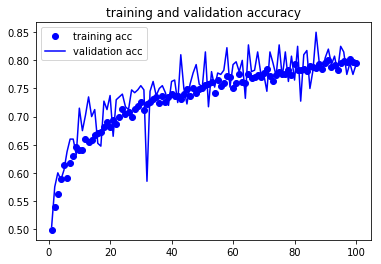

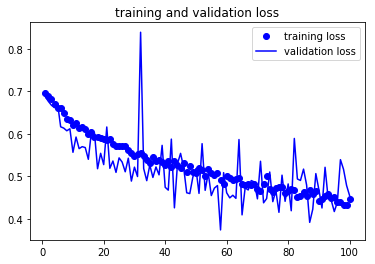

In [14]:
plt.plot(epochs, acc, 'bo', label='training acc')
plt.plot(epochs, val_acc, 'b', label='validation acc')
plt.title('training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='training loss')
plt.plot(epochs, val_loss, 'b', label='validation loss')
plt.title('training and validation loss')
plt.legend()
plt.show()